In [21]:
import  torch
from  torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import DataSet_2
import math
import Model_2

In [3]:
FaceData=DataSet_2.TorchFacialFeaturesDataset();

In [4]:
generator=torch.Generator().manual_seed(699)
train_size = int(0.85 * len(FaceData))
test_size = len(FaceData) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(FaceData, [train_size, test_size],generator=generator)


In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True, num_workers=2)
model=Model_2.MLP(9216,30).double()

#meta params
epochs=100
learning_rate=0.005
samples=len(train_dataset)
batches=math.ceil(samples/20)
loss_values=[]

criterion = nn.MSELoss().double()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


Epoch 10/100 step 1/182 loss=0.0025970898522412987
Epoch 10/100 step 11/182 loss=0.0054857230666864425
Epoch 10/100 step 21/182 loss=0.002734669380438255
Epoch 10/100 step 31/182 loss=0.004248278290506452
Epoch 10/100 step 41/182 loss=0.0033308126340396726
Epoch 10/100 step 51/182 loss=0.003649948174066223
Epoch 10/100 step 61/182 loss=0.0025001617209487116
Epoch 10/100 step 71/182 loss=0.004195656163627831
Epoch 10/100 step 81/182 loss=0.0027282757978012743
Epoch 10/100 step 91/182 loss=0.0026813476684476065
Epoch 10/100 step 101/182 loss=0.003274499510060993
Epoch 10/100 step 111/182 loss=0.0028081308676910334
Epoch 10/100 step 121/182 loss=0.004418674467759504
Epoch 10/100 step 131/182 loss=0.0039066094910156345
Epoch 10/100 step 141/182 loss=0.003221985076154071
Epoch 10/100 step 151/182 loss=0.0028239019699090955
Epoch 10/100 step 161/182 loss=0.0033961418726051835
Epoch 10/100 step 171/182 loss=0.002984885708635664
Epoch 10/100 step 181/182 loss=0.002126370931604483
Epoch 20/100 

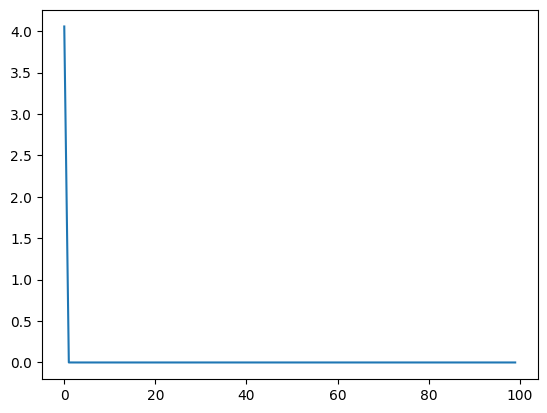

In [24]:
#training
for epoch in range(epochs):
    epoch_loss=0.0
    for i,(inputs,labels) in enumerate(dataloader):
        inputs=inputs.to(device)
        labels=labels.to(device)
        
        #forward
        outputs = model(inputs)
        loss=criterion(outputs,labels)
        epoch_loss+=loss.item()
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch+1)%10==0 and i%10==0:
            print(f'Epoch {epoch+1}/{epochs} step {i+1}/{batches} loss={loss.item()}')
    
    loss_values.append(epoch_loss/len(train_dataset))

plt.plot(loss_values)        
        

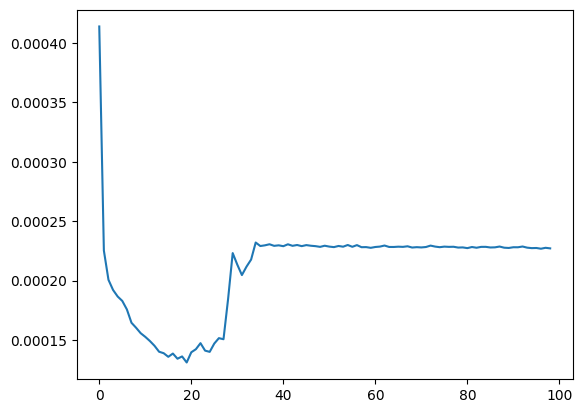

In [27]:
plt.plot(loss_values[1:])

In [34]:
# testing 
with torch.no_grad():
    test_samples=0
    accurate_samples=0
    for i,(inputs,labels) in enumerate(test_dataset):
        test_samples+=30
        accurate_samples+=((model(inputs)-labels)*48<2).sum().item()
        if(i%50==0):
            print(f"test set elements: {i}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")


test set elements: 0, test_samples: 30, accurate_samples: 23 accuracy: 76.66666666666667%
test set elements: 50, test_samples: 1530, accurate_samples: 1224 accuracy: 80.0%
test set elements: 100, test_samples: 3030, accurate_samples: 2426 accuracy: 80.06600660066006%
test set elements: 150, test_samples: 4530, accurate_samples: 3607 accuracy: 79.62472406181016%
test set elements: 200, test_samples: 6030, accurate_samples: 4767 accuracy: 79.0547263681592%
test set elements: 250, test_samples: 7530, accurate_samples: 5963 accuracy: 79.18990703851262%
test set elements: 300, test_samples: 9030, accurate_samples: 7171 accuracy: 79.41306755260243%
test set elements: 350, test_samples: 10530, accurate_samples: 8300 accuracy: 78.8224121557455%
test set elements: 400, test_samples: 12030, accurate_samples: 9453 accuracy: 78.5785536159601%
test set elements: 450, test_samples: 13530, accurate_samples: 10609 accuracy: 78.41093865484109%
test set elements: 500, test_samples: 15030, accurate_sampl

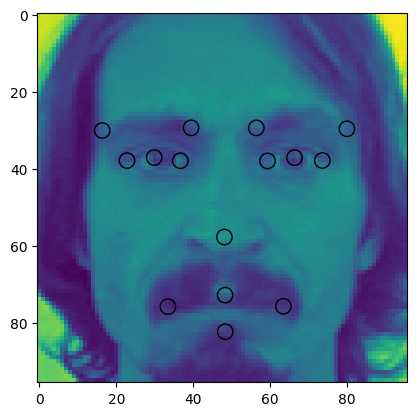

In [35]:
# test set prediction visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
Pred=(model(test_dataset[2][0]).detach().numpy()+1)*48
Im=test_dataset[2][0].numpy().reshape(96,96)
fig,ax=plt.subplots(1)
ax.imshow(Im)
for i in range(0,30,2):
    circ=patches.Circle((Pred[i],Pred[i+1]),fill=False,radius=2)
    ax.add_patch(circ)
plt.show()

In [36]:
torch.save(optimizer.state_dict(),"Model2Optimizer.pth")
torch.save(model.state_dict(),"Model2Model.pth")

In [ ]:
# loading test
loadedModel=Model_2.MLP(9216,30).double()
loadedModel.load_state_dict(torch.load('Model2Model.pth'))